In [2]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")


import seaborn as sns
sns.set_theme()
palette = sns.color_palette("Set2")
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

import xgboost as xgb


In [3]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

sample_submission = pd.read_csv('./input/sampleSubmission.csv')

In [4]:
test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [6]:
train.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [8]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
cols = train.columns
cols

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [10]:
cont_features = ['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']

In [11]:
train.drop('Id', inplace=True, axis=1)

test_id = test['Id']
test.drop('Id', inplace=True, axis=1)

train

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,...,0,0,0,0,0,0,0,0,0,3
15116,2603,121,19,633,195,618,249,221,91,1325,...,0,0,0,0,0,0,0,0,0,3
15117,2492,134,25,365,117,335,250,220,83,1187,...,0,0,0,0,0,0,0,0,0,3
15118,2487,167,28,218,101,242,229,237,119,932,...,0,0,0,0,0,0,0,0,0,3


In [12]:
std_scaler = StandardScaler()

train[cont_features] = std_scaler.fit_transform(train[cont_features])
test[cont_features] = std_scaler.transform(test[cont_features])

train

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,-0.367095,-0.959980,-1.597132,0.146639,-0.834074,-0.908681,221,232,148,4.334805,...,0,0,0,0,0,0,0,0,0,5
1,-0.381461,-0.914559,-1.715424,-0.072337,-0.932054,-0.999246,220,235,151,4.285710,...,0,0,0,0,0,0,0,0,0,5
2,0.130912,-0.160577,-0.887379,0.194243,0.227369,1.106379,234,238,135,4.191156,...,0,0,0,0,0,0,0,0,0,2
3,0.085421,-0.015231,0.177250,0.070474,1.092853,1.038455,238,238,122,4.272981,...,0,0,0,0,0,0,0,0,0,2
4,-0.369489,-1.014485,-1.715424,-0.353198,-0.850404,-0.998491,220,234,150,4.237524,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,-0.340758,0.784172,0.768711,0.146639,-0.719765,-0.795476,170,251,214,-0.208335,...,0,0,0,0,0,0,0,0,0,3
15116,-0.350335,-0.324091,0.295543,1.931773,2.350255,-0.827173,249,221,91,-0.169240,...,0,0,0,0,0,0,0,0,0,3
15117,-0.616099,-0.205998,1.005295,0.655997,1.076523,-1.040755,250,220,83,-0.294706,...,0,0,0,0,0,0,0,0,0,3
15118,-0.628070,0.093779,1.360172,-0.043775,0.815245,-1.110942,229,237,119,-0.526545,...,0,0,0,0,0,0,0,0,0,3


In [13]:
train['Cover_Type'].unique()

array([5, 2, 1, 7, 3, 6, 4], dtype=int64)

<Axes: xlabel='Cover_Type', ylabel='count'>

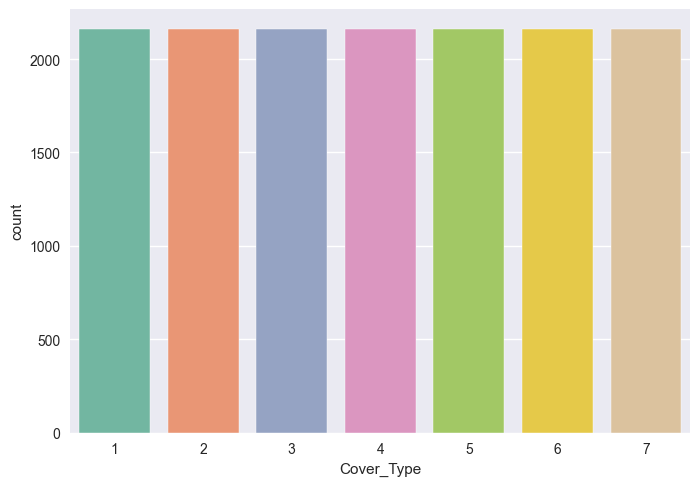

In [14]:
sns.countplot(data=train, x='Cover_Type', hue='Cover_Type', palette=palette, legend=False)

In [15]:
train[['Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']].sum()

Soil_Type4      843
Soil_Type5      165
Soil_Type6      650
Soil_Type7        0
Soil_Type8        1
Soil_Type9       10
Soil_Type10    2142
Soil_Type11     406
Soil_Type12     227
Soil_Type13     476
Soil_Type14     169
Soil_Type15       0
Soil_Type16     114
Soil_Type17     612
Soil_Type18      60
Soil_Type19      46
Soil_Type20     139
Soil_Type21      16
Soil_Type22     345
Soil_Type23     757
Soil_Type24     257
Soil_Type25       1
Soil_Type26      54
Soil_Type27      15
Soil_Type28       9
Soil_Type29    1291
Soil_Type30     725
Soil_Type31     332
Soil_Type32     690
Soil_Type33     616
Soil_Type34      22
Soil_Type35     102
Soil_Type36      10
Soil_Type37      34
Soil_Type38     728
Soil_Type39     657
Soil_Type40     459
dtype: int64

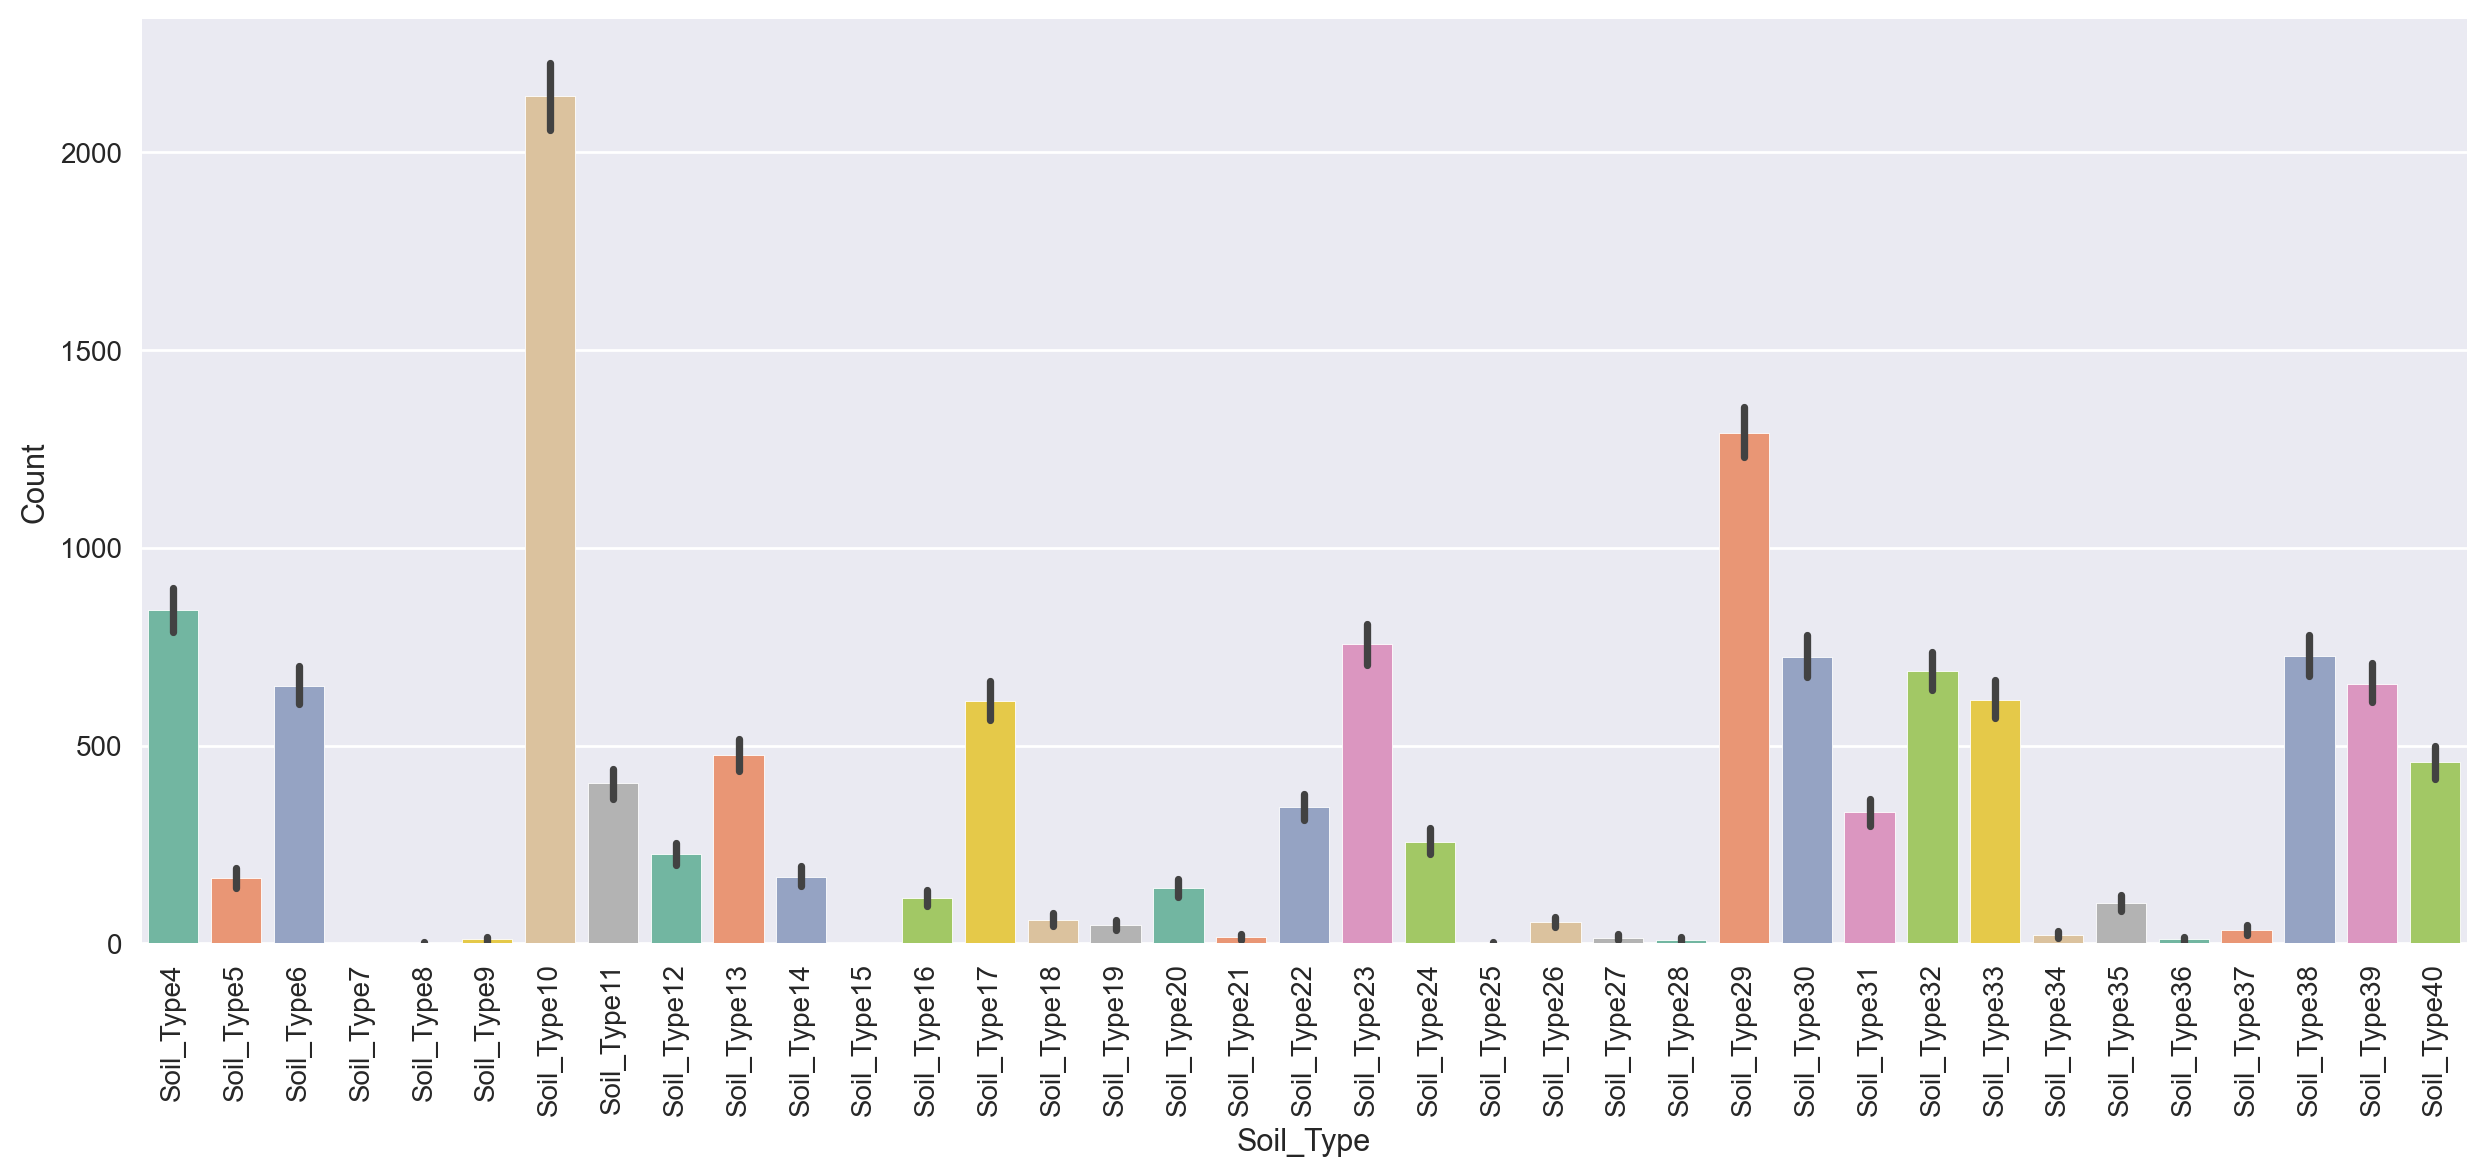

In [16]:
soil_cols = ['Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

plt.figure(figsize=(15, 6), dpi=200)
sns.barplot(data=train[soil_cols].melt(var_name="Soil_Type", value_name="Count"),
             x="Soil_Type", y="Count", estimator=np.sum,
             hue="Soil_Type", palette=palette, legend=False)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Wilderness_Area', ylabel='Count'>

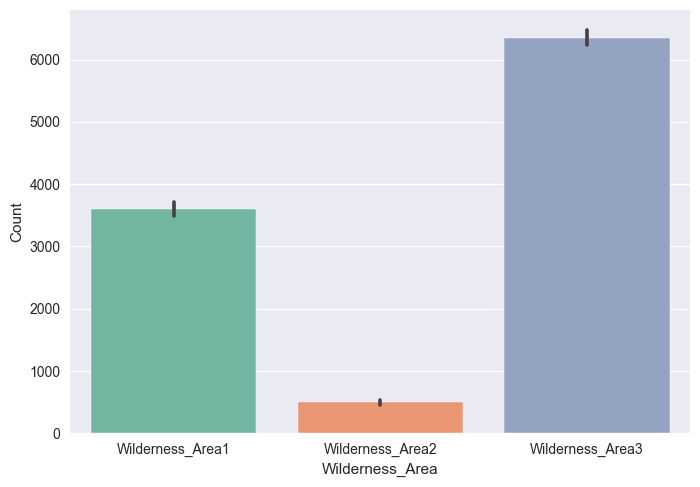

In [17]:
sns.barplot(data=train[['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3']].melt(var_name="Wilderness_Area", value_name="Count"), 
            x="Wilderness_Area", y="Count", estimator=np.sum,
            palette=palette, legend=False
            )

In [18]:
# sns.histplot(data=train['Elevation'], kde=True)

In [19]:
cont_features

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points']

In [20]:
#sns.pairplot(data=train[['Elevation','Aspect','Slope']], corner=True)

In [21]:
#sns.pairplot(data=train[[ 'Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
# 'Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points']], corner=True)

In [22]:
cols

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

<Axes: xlabel='Cover_Type', ylabel='Elevation'>

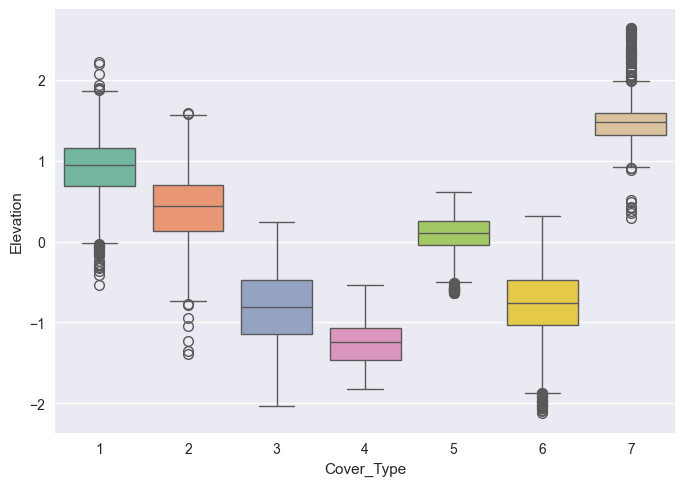

In [23]:
sns.boxplot(data=train, y="Elevation", x="Cover_Type", hue="Cover_Type", palette=palette, legend=False)

<Axes: xlabel='Cover_Type', ylabel='Aspect'>

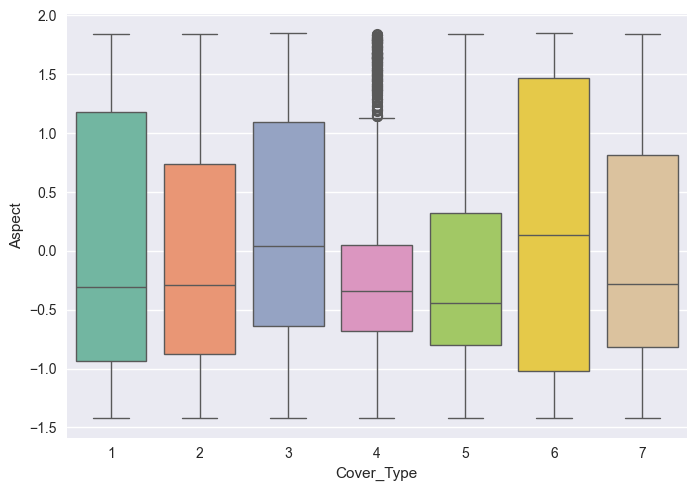

In [24]:
sns.boxplot(data=train, y='Aspect', x='Cover_Type', hue="Cover_Type", palette=palette, legend=False)

In [25]:
#sns.histplot(data=train[train['Cover_Type'] == 4], x='Aspect')

<Axes: xlabel='Cover_Type', ylabel='Slope'>

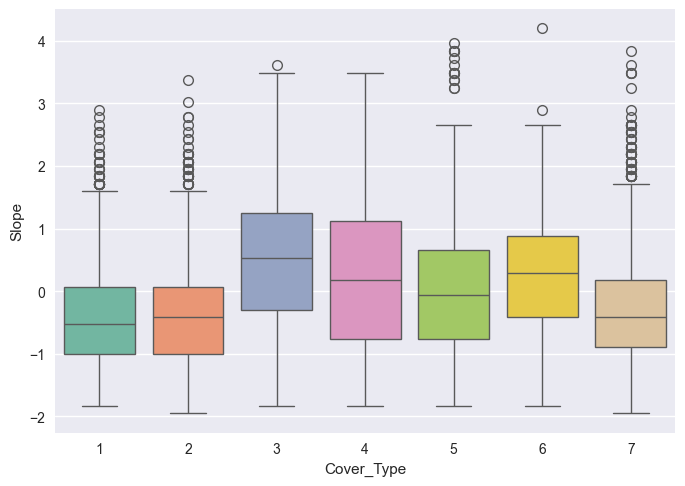

In [26]:
sns.boxplot(data=train, y='Slope', x='Cover_Type', hue="Cover_Type", palette=palette, legend=False)

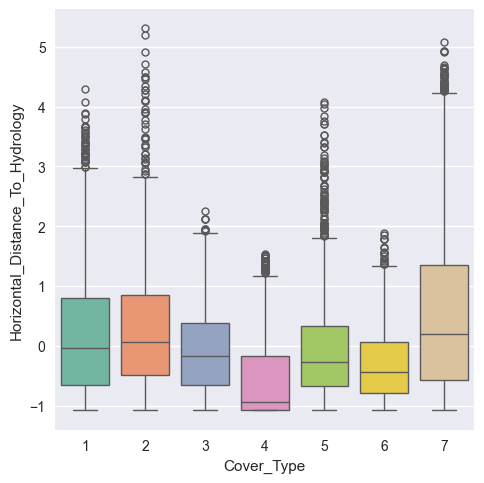

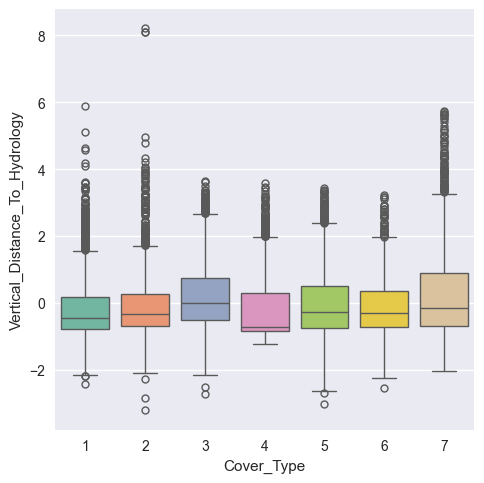

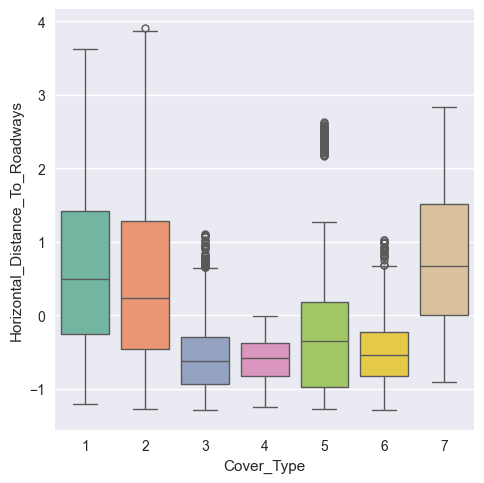

In [27]:
dists_cols = ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']

for col in dists_cols:
    sns.catplot(data=train, x='Cover_Type', y=col, kind='box', hue="Cover_Type", palette=palette, legend=False)

In [28]:
# handle_outliers
train_clipped = train.copy()

for column in train_clipped[cont_features]:
    mean = train_clipped[column].mean()
    std = train_clipped[column].std()
    lower_limit = mean - 2 * std
    upper_limit = mean + 2 * std

    train_clipped[column] = np.clip(train_clipped[column], lower_limit, upper_limit)

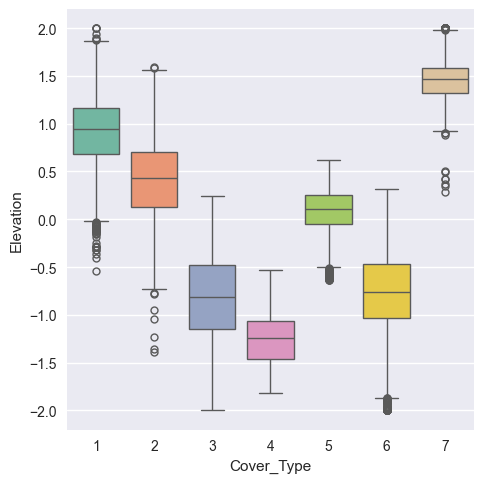

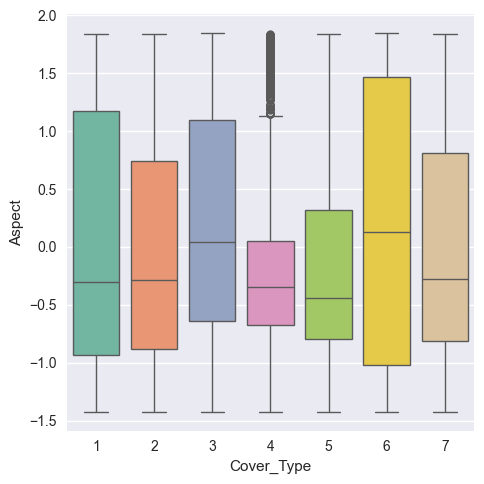

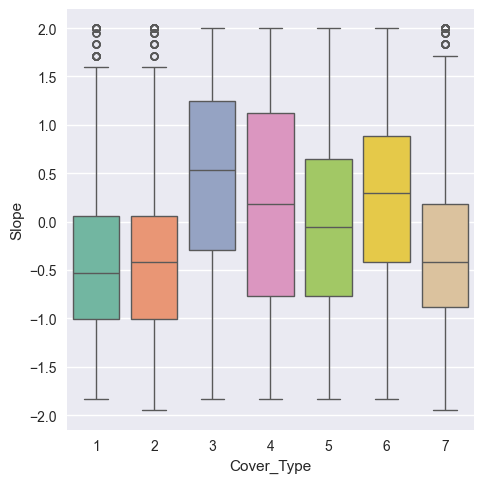

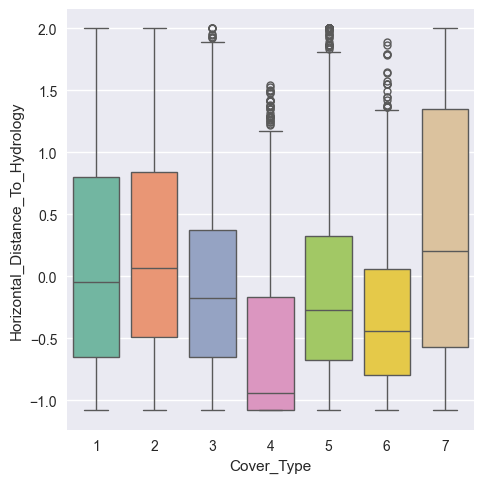

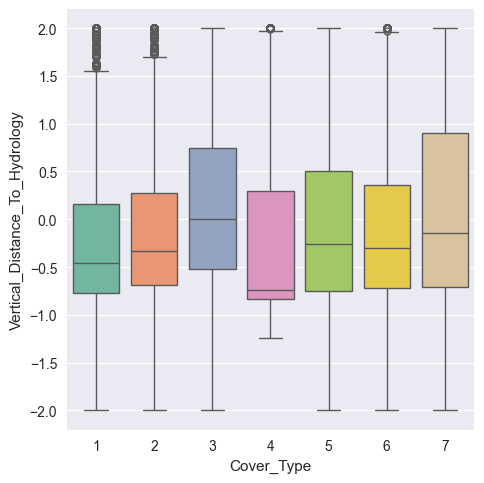

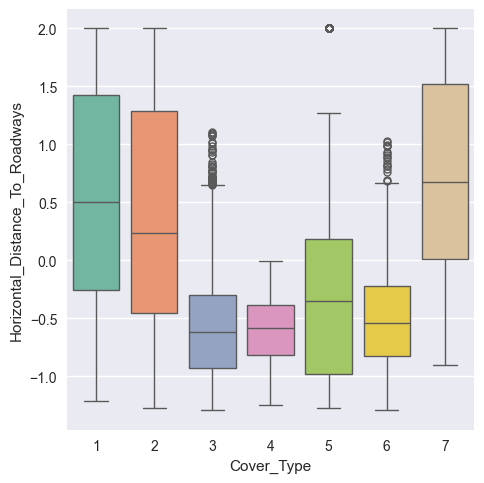

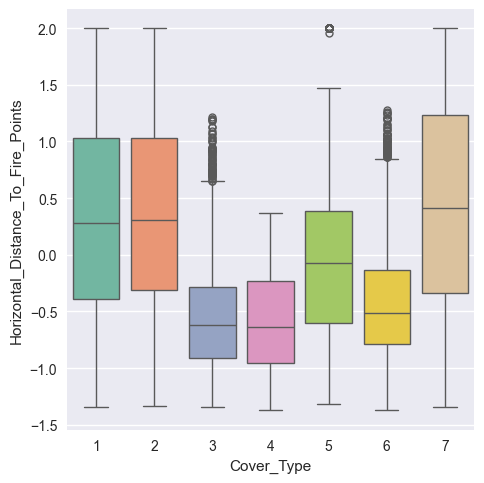

In [29]:
for col in cont_features:
    sns.catplot(data=train_clipped, x='Cover_Type', y=col, kind='box', hue="Cover_Type", palette=palette, legend=False)

In [30]:
obv_outliers_cols = ['Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']

for column in obv_outliers_cols:
    filtered_data = train_clipped[train_clipped['Cover_Type'] == 5][column]

    Q1 = filtered_data.quantile(0.25)
    Q3 = filtered_data.quantile(0.75)

    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    train_clipped.loc[(train_clipped['Cover_Type'] == 5) & (train_clipped[column] < lower_limit), column] = lower_limit
    train_clipped.loc[(train_clipped['Cover_Type'] == 5) & (train_clipped[column] > upper_limit), column] = upper_limit

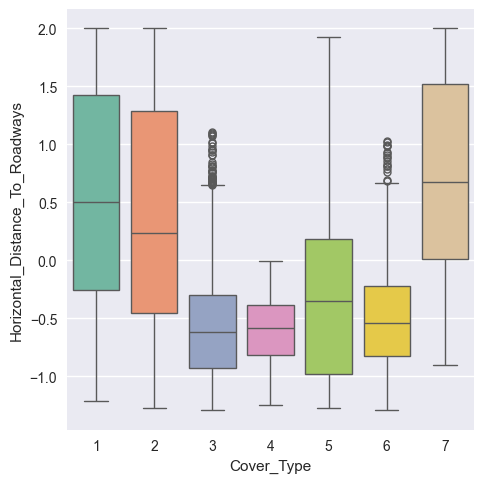

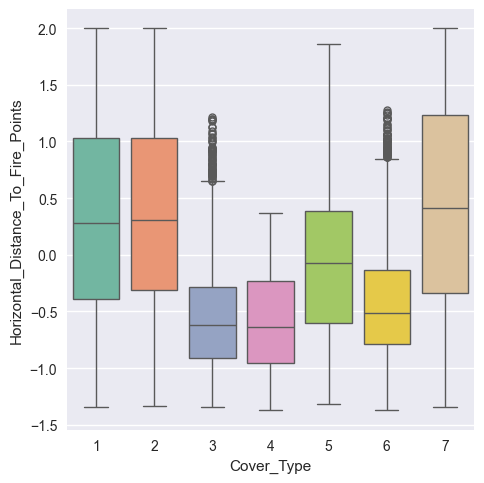

In [31]:
for col in obv_outliers_cols:
    sns.catplot(data=train_clipped, x='Cover_Type', y=col, kind='box', hue="Cover_Type", palette=palette, legend=False)

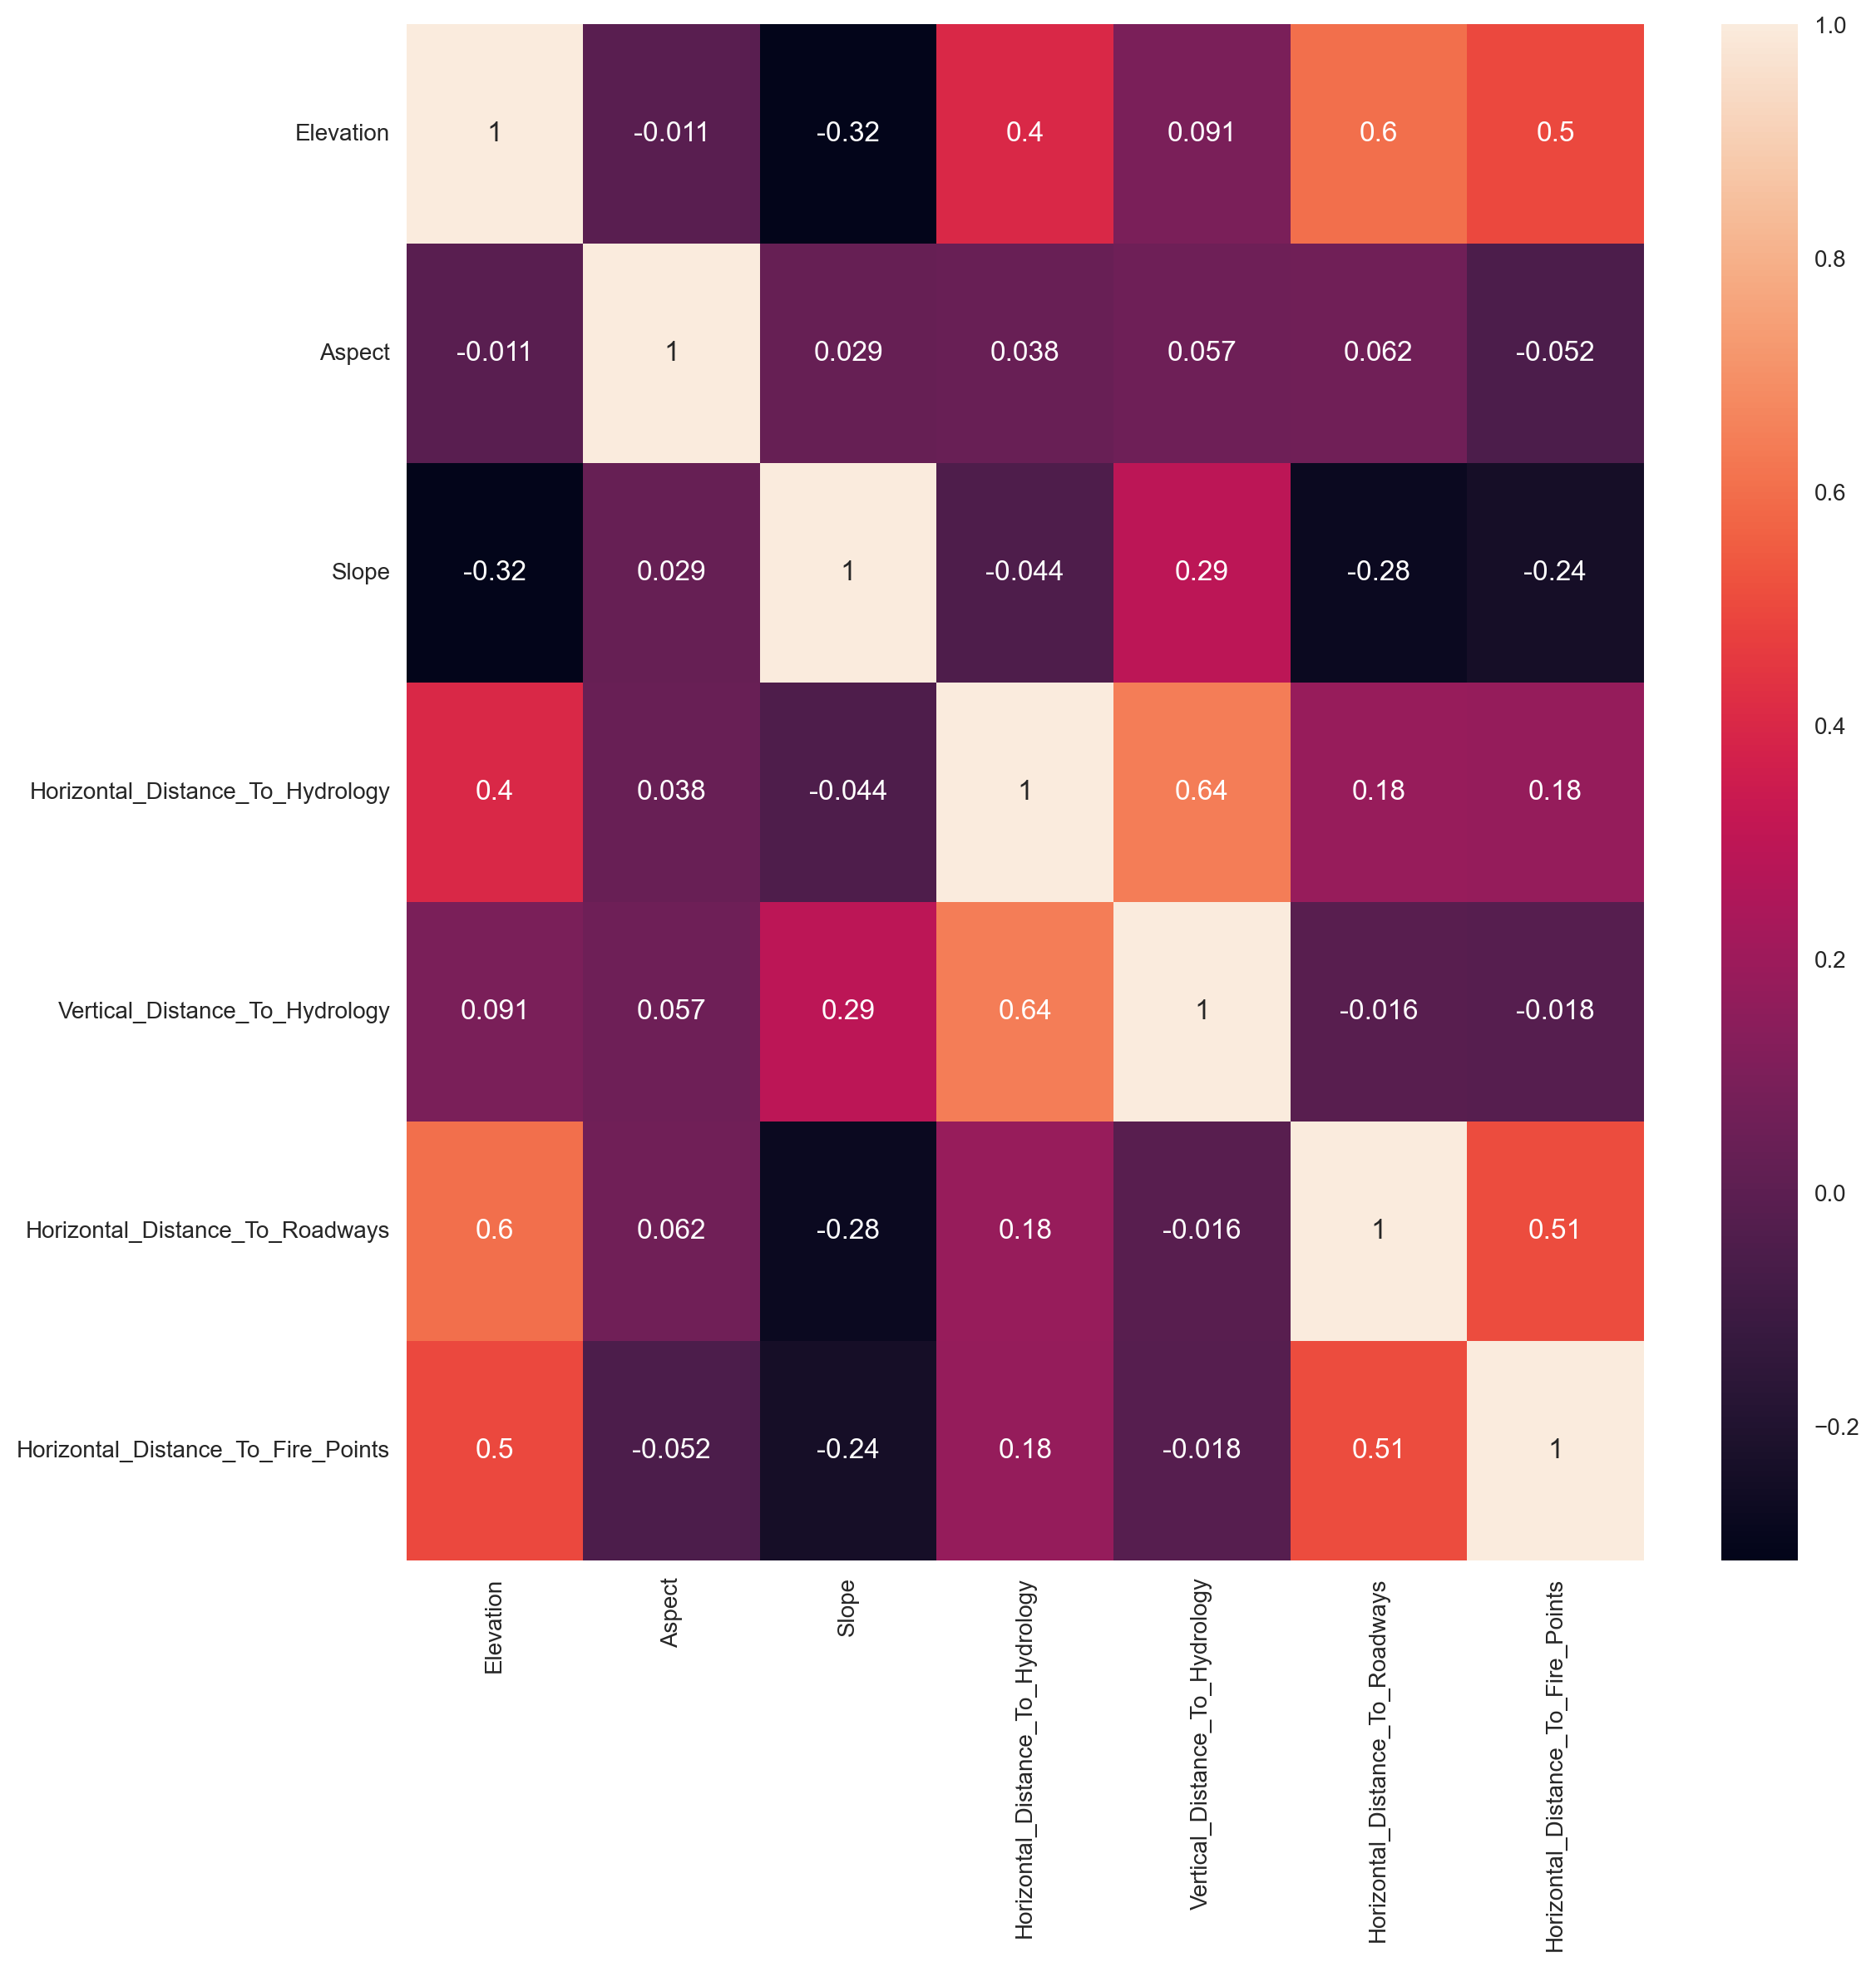

In [32]:
plt.figure(figsize=(12, 12), dpi=200)
sns.heatmap(data=train_clipped[cont_features].corr(), annot=True)
plt.show()

In [33]:
X = train_clipped.drop('Cover_Type', axis=1)
y = train_clipped['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [35]:
# SVM
svc_model = SVC(kernel='linear', C=15)

# param_grid = {  # lin
#         'C': [15],
#         'kernel': ['linear']
#     }

# grid_svc = GridSearchCV(svc_model, param_grid, cv=3)
svc_model.fit(X_train, y_train)

# svc_model.best_params_

SVC(C=15, kernel='linear')

In [38]:
#GradientBoosting
# param_grid = {
#     'n_estimators': [1000],
#     'learning_rate': [0.1],
#     'max_depth': [9],
#     'subsample': [0.6],
#     'max_features': ['sqrt'],
#     'min_samples_leaf': [4],
#     'min_samples_split': [5]
# }

gb_model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, 
                                      max_depth=9, subsample=0.6, max_features='sqrt', 
                                      min_samples_leaf=4, min_samples_split=5)
# gb_grid = GridSearchCV(gb_model, param_grid, cv=5)
gb_model.fit(X_train, y_train)
# gb_grid.best_params_

GradientBoostingClassifier(max_depth=9, max_features='sqrt', min_samples_leaf=4,
                           min_samples_split=5, n_estimators=1000,
                           subsample=0.6)

In [36]:
# xgb
y_xgb_train = y_train - 1
y_xgb_test = y_test - 1

x_xgb_train = xgb.DMatrix(X_train, label=y_xgb_train)
x_xgb_test = xgb.DMatrix(X_test, label=y_xgb_test)

params = {
    'objective': 'multi:softmax',
    'num_class': 7,
    'eval_metric': 'mlogloss',  
    'eta': 0.1,
    'max_depth': 5,
    'subsample': 0.6,
    'colsample_bytree': 0.8,
    'seed': 17
}
evals = [(x_xgb_train, 'train'), (x_xgb_test, 'val')]

xgb_model = xgb.train(params, x_xgb_train, num_boost_round=700, evals=evals, 
                  early_stopping_rounds=50, verbose_eval=10)

[0]	train-mlogloss:1.78229	val-mlogloss:1.78569
[10]	train-mlogloss:1.03890	val-mlogloss:1.06764
[20]	train-mlogloss:0.77517	val-mlogloss:0.81588
[30]	train-mlogloss:0.64082	val-mlogloss:0.69080
[40]	train-mlogloss:0.56175	val-mlogloss:0.61889
[50]	train-mlogloss:0.51192	val-mlogloss:0.57508
[60]	train-mlogloss:0.47478	val-mlogloss:0.54448
[70]	train-mlogloss:0.44570	val-mlogloss:0.52153
[80]	train-mlogloss:0.41937	val-mlogloss:0.50310
[90]	train-mlogloss:0.39570	val-mlogloss:0.48831
[100]	train-mlogloss:0.37326	val-mlogloss:0.47430
[110]	train-mlogloss:0.35276	val-mlogloss:0.46176
[120]	train-mlogloss:0.33368	val-mlogloss:0.45081
[130]	train-mlogloss:0.31609	val-mlogloss:0.44174
[140]	train-mlogloss:0.30100	val-mlogloss:0.43525
[150]	train-mlogloss:0.28590	val-mlogloss:0.42822
[160]	train-mlogloss:0.27151	val-mlogloss:0.42195
[170]	train-mlogloss:0.25865	val-mlogloss:0.41703
[180]	train-mlogloss:0.24678	val-mlogloss:0.41275
[190]	train-mlogloss:0.23528	val-mlogloss:0.40798
[200]	train

In [39]:
#xgb_pred = xgb_model.predict(x_xgb_test)
#xgb_pred += 1

#svc_pred = svc_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

#accuracy_xgb = accuracy_score(y_test, xgb_pred)
#accuracy_svc = accuracy_score(y_test, svc_pred)
accuracy_gb = accuracy_score(y_test, gb_pred)

#print(f'xgb accuracy: {accuracy_xgb}')
#print(f'svc accuracy: {accuracy_svc}')
print(f'gb accuracy: {accuracy_gb}')     # 0.854, 0.867

gb accuracy: 0.8700396825396826


In [40]:
confusion_matrix(y_test, gb_pred)

array([[336,  77,   1,   0,   5,   0,  18],
       [ 88, 313,   7,   0,  20,   8,   4],
       [  0,   6, 385,  22,   4,  55,   0],
       [  0,   0,   4, 432,   0,   5,   0],
       [  0,  12,   4,   0, 394,   3,   0],
       [  0,   4,  25,   5,   2, 343,   0],
       [ 14,   0,   0,   0,   0,   0, 428]], dtype=int64)

In [41]:
sample_submission

,Id,Cover_Type
0,15121,1
1,15122,1
2,15123,1
3,15124,1
4,15125,1
...,...,...
565887,581008,1
565888,581009,1
565889,581010,1
565890,581011,1


In [42]:
# final
final_pred_gb = gb_model.predict(test)

submission_gb = pd.DataFrame({'Id': test_id, 'Cover_Type': final_pred_gb})
submission_gb

,Id,Cover_Type
0,15121,2
1,15122,2
2,15123,2
3,15124,2
4,15125,2
...,...,...
565887,581008,3
565888,581009,3
565889,581010,3
565890,581011,3


In [44]:
submission_gb.to_csv('./output/submission.csv', index=False)